# DATA SCIENCE INTERN @BHARAT INTERN

### AUTHOR : TUSHAR KUMAR

# TASK 1 : STOCK PREDICTION

## PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

## ABOUT DATASET
### Google Stock Prediction

This dataset contains historical data of **Google's stock prices** and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

1. **Symbol**: The name of the company, which is **GOOG** in this case.
2. **Date**: The year and date of the stock data.
3. **Close**: The closing price of Google's stock on a particular day.
4. **High**: The highest value reached by Google's stock on the given day.
5. **Low**: The lowest value reached by Google's stock on the given day.
6. **Open**: The opening value of Google's stock on the given day.
7. **Volume**: The trading volume of Google's stock on the given day, i.e., the number of shares traded.
8. **adjClose**: The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
9. **adjHigh**: The adjusted highest value reached by Google's stock on the given day.
10. **adjLow**: The adjusted lowest value reached by Google's stock on the given day.
11. **adjOpen**: The adjusted opening value of Google's stock on the given day.
12. **adjVolume**: The adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
13. **divCash**: The amount of cash dividend paid out to shareholders on the given day.
14. **splitFactor**: The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.

The dataset is available at Kaggle : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction

## STEPS INVOLVED : 
### 1 . IMPORTING LIBRARIES AND DATA TO BE USED
### 2. GATHERING INSIGHTS
### 3. DATA PRE-PROCESSING
### 4. CREATING LSTM MODEL
### 5. VISUALIZING ACTUAL VS PREDICTED DATA
### 6. PREDICTING UPCOMING 15 DAYS

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [25]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings 

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from datetime import datetime, timedelta

In [26]:
df = pd.read_csv('AAPL.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


## STEP 2 : GATHERING INSIGHTS

In [27]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1258, 15)


In [28]:
# statistical description of data
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [29]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


In [30]:
# checking null values
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### There are no null values in the dataset

In [31]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,open,close
date,,
2015-05-27,130.34,132.045
2015-05-28,131.86,131.780
2015-05-29,131.23,130.280
2015-06-01,131.20,130.535
2015-06-02,129.86,129.960
2015-06-03,130.66,130.120
2015-06-04,129.58,129.360
2015-06-05,129.50,128.650
2015-06-08,128.90,127.800


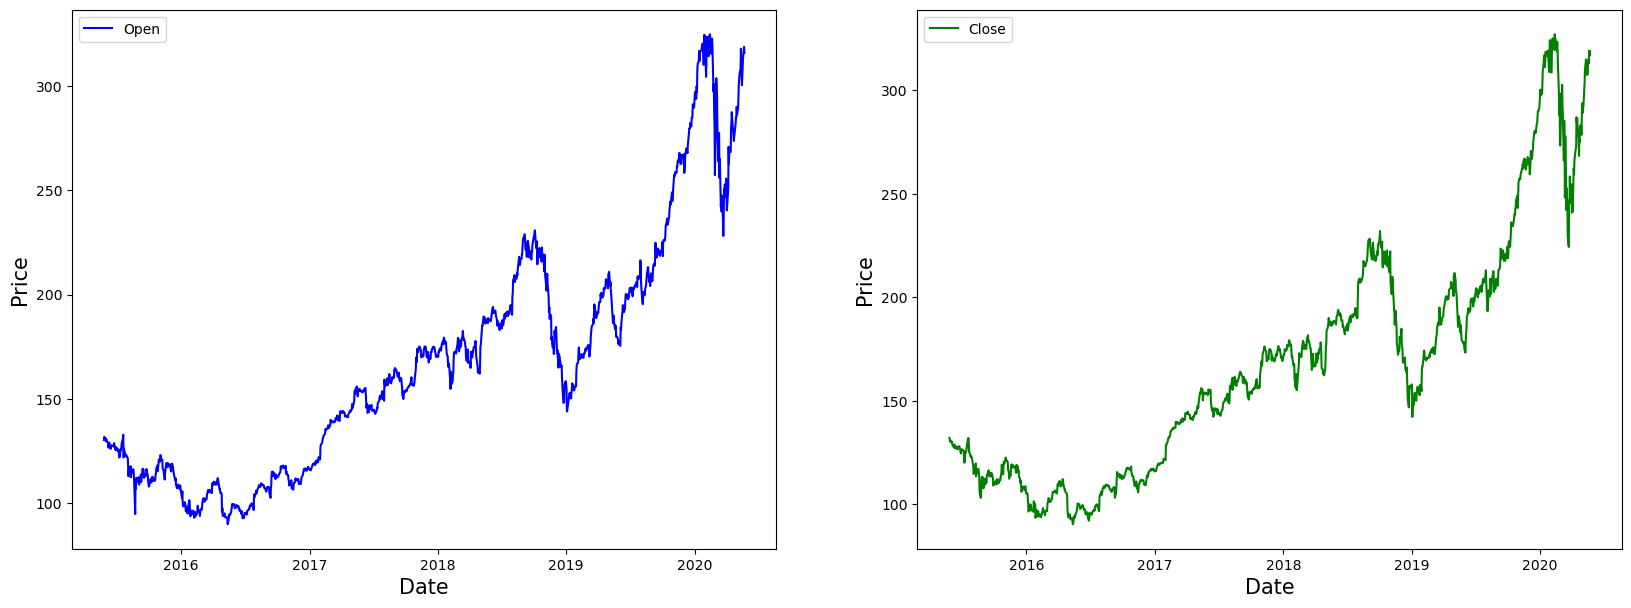

In [32]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## STEP 3 : DATA PRE-PROCESSING

In [33]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2015-05-27,0.171857,0.176074
2015-05-28,0.178333,0.174956
2015-05-29,0.175649,0.168623
2015-06-01,0.175521,0.169699
2015-06-02,0.169812,0.167272
2015-06-03,0.173220,0.167947
2015-06-04,0.168619,0.164739
2015-06-05,0.168278,0.161741
2015-06-08,0.165722,0.158152


In [34]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [35]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [36]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [37]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

## STEP 4 :  CREATING LSTM MODEL

In [38]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 66ms/step - loss: 0.0112 - mean_absolute_error: 0.0702 - val_loss: 0.0220 - val_mean_absolute_error: 0.1208
Epoch 2/100
28/28 [==============================] - 1s 44ms/step - loss: 9.1297e-04 - mean_absolute_error: 0.0229 - val_loss: 0.0078 - val_mean_absolute_error: 0.0692
Epoch 3/100
28/28 [==============================] - 1s 39ms/step - loss: 6.8836e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0096 - val_mean_absolute_error: 0.0785
Epoch 4/100
28/28 [==============================] - 1s 38ms/step - loss: 6.6905e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0092 - val_mean_absolute_error: 0.0783
Epoch 5/100
28/28 [==============================] - 1s 36ms/step - loss: 6.3265e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0093 - val_mean_absolute_error: 0.0791
Epoch 6/100
28/28 [==============================] - 1s 35ms/step - loss: 6.0566e-04 - mean_absolute_error: 0.0180 - val_loss: 0.0065 - val_mean_absolute_error: 0.0

28/28 [==============================] - 1s 42ms/step - loss: 2.6145e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0016 - val_mean_absolute_error: 0.0318
Epoch 50/100
28/28 [==============================] - 1s 43ms/step - loss: 2.6931e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0015 - val_mean_absolute_error: 0.0290
Epoch 51/100
28/28 [==============================] - 1s 42ms/step - loss: 3.1253e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0027 - val_mean_absolute_error: 0.0429
Epoch 52/100
28/28 [==============================] - 1s 44ms/step - loss: 2.6992e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0016 - val_mean_absolute_error: 0.0303
Epoch 53/100
28/28 [==============================] - 1s 39ms/step - loss: 2.6075e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0016 - val_mean_absolute_error: 0.0319
Epoch 54/100
28/28 [==============================] - 1s 40ms/step - loss: 2.3239e-04 - mean_absolute_error: 0.0110 - val_loss: 0.0014 - val_mean_absolute_error: 0.0277

28/28 [==============================] - 1s 37ms/step - loss: 1.5477e-04 - mean_absolute_error: 0.0089 - val_loss: 6.7943e-04 - val_mean_absolute_error: 0.0182
Epoch 98/100
28/28 [==============================] - 1s 37ms/step - loss: 1.6126e-04 - mean_absolute_error: 0.0089 - val_loss: 7.5880e-04 - val_mean_absolute_error: 0.0197
Epoch 99/100
28/28 [==============================] - 1s 36ms/step - loss: 1.6303e-04 - mean_absolute_error: 0.0092 - val_loss: 7.3202e-04 - val_mean_absolute_error: 0.0194
Epoch 100/100
28/28 [==============================] - 1s 33ms/step - loss: 1.4348e-04 - mean_absolute_error: 0.0087 - val_loss: 0.0012 - val_mean_absolute_error: 0.0262


In [40]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 12ms/step


array([[0.48937336, 0.4830547 ],
       [0.47956738, 0.47245133],
       [0.47088775, 0.46329558],
       [0.45937714, 0.45170003],
       [0.42781767, 0.4208094 ]], dtype=float32)

In [41]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[204.8706 , 204.75633],
       [202.56885, 202.24481],
       [200.53148, 200.07619],
       [197.82959, 197.32967],
       [190.42165, 190.01291]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [42]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [43]:
# Inversing normalization/scaling 
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2019-05-08,201.900,202.90,204.870605,204.756332
2019-05-09,200.400,200.72,202.568848,202.244812
2019-05-10,197.419,197.18,200.531479,200.076187
2019-05-13,187.710,185.72,197.829590,197.329666
2019-05-14,186.410,188.66,190.421646,190.012909


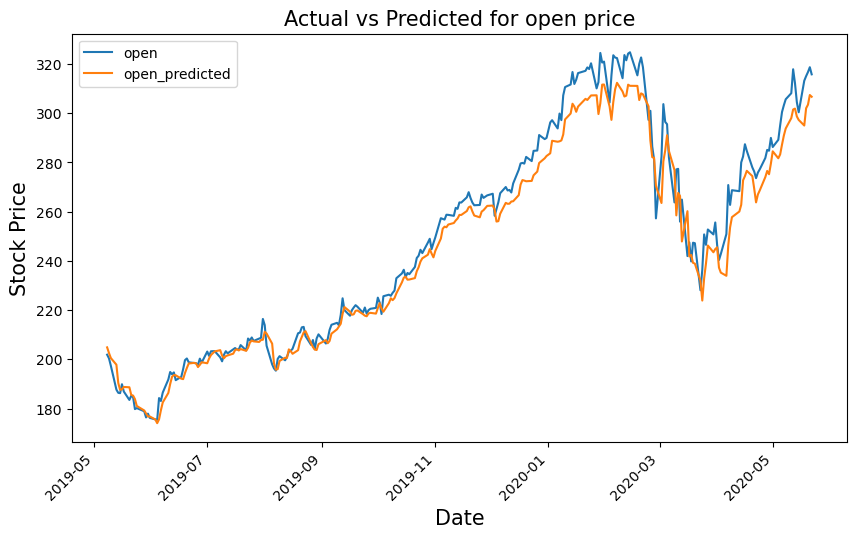

In [44]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

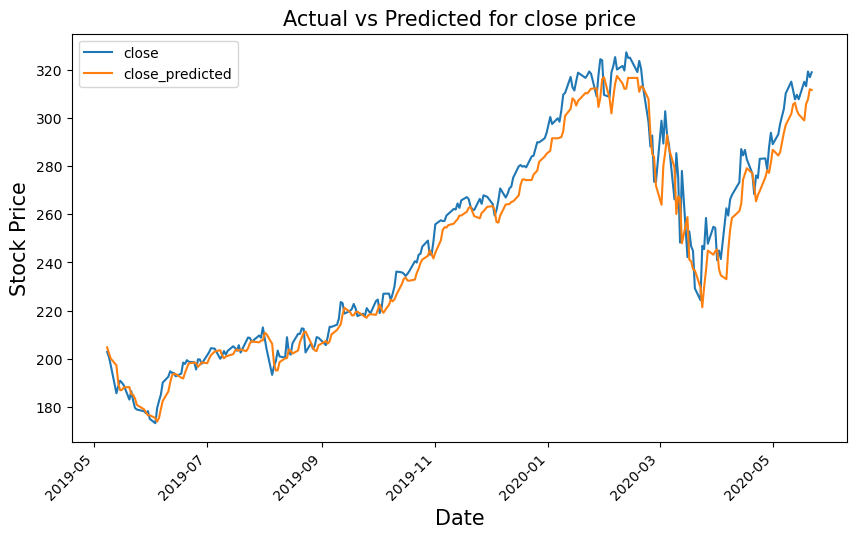

In [45]:
# plotting the actual close and predicted close prices on date index 
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [54]:
# Creating a dataframe and adding 10 days to existing index 

df_merge = pd.concat([df_merge,pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D'))],axis=0)
df_merge['2020-05-20':'2020-05-27']

,open,close,open_predicted,close_predicted
2020-05-20,316.68,319.23,303.438141,307.629364
2020-05-21,318.66,316.85,307.364594,311.875427
2020-05-22,315.77,318.89,306.667572,311.546478
2020-05-22,NaN,NaN,NaN,NaN
2020-05-23,NaN,NaN,NaN,NaN
2020-05-24,NaN,NaN,NaN,NaN
2020-05-25,NaN,NaN,NaN,NaN
2020-05-26,NaN,NaN,NaN,NaN
2020-05-27,NaN,NaN,NaN,NaN


In [55]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [56]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 46ms/step


In [57]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

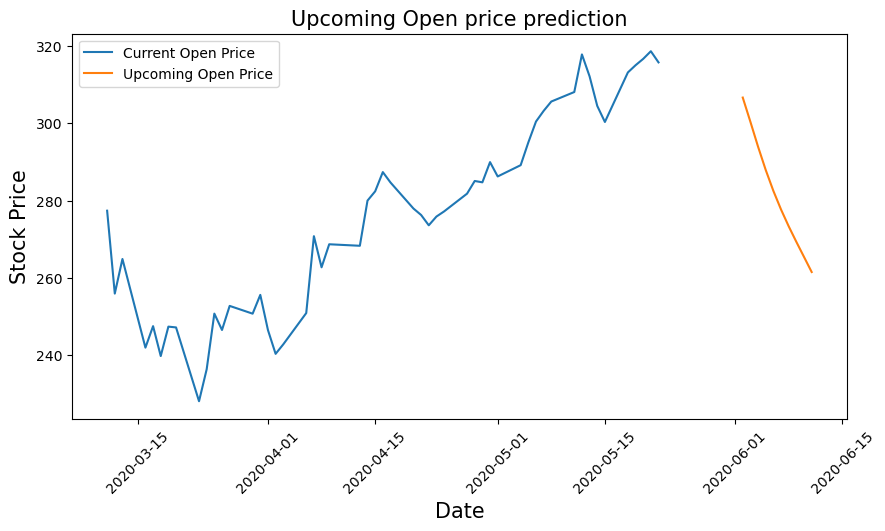

In [60]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2020-03-11':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2020-03-11':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

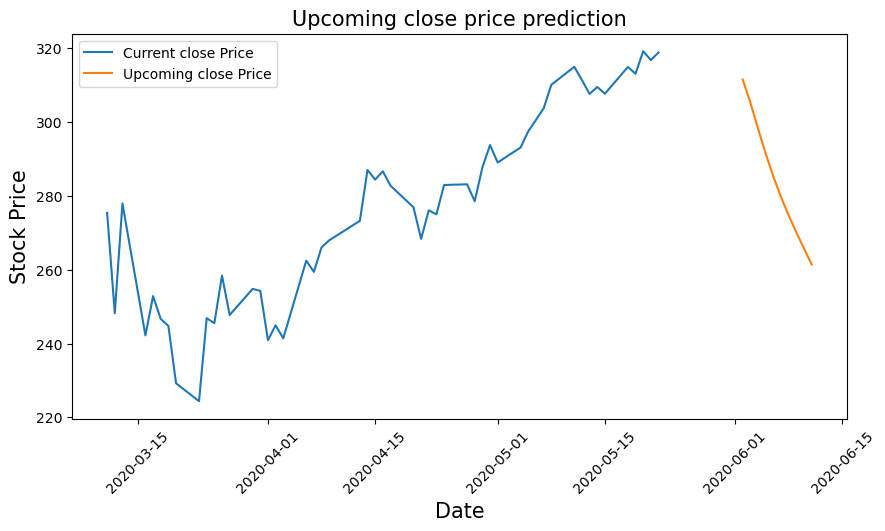

In [62]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2020-03-11':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2020-03-11':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# THANK YOU!